# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**dataset downloaded from:** https://raw.githubusercontent.com/DataScienceRoadMapDSRM/Tableau-Dashboards-info/main/netflix_titles.csv

# Loading & Preprocessing the data

In [2]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

As there are lot of null values & all of them belonging to categorical features we cannot simply replace them. For replacing, we will have to do the manual research which will consume a lot of time. So I am keeping the null values as it is.

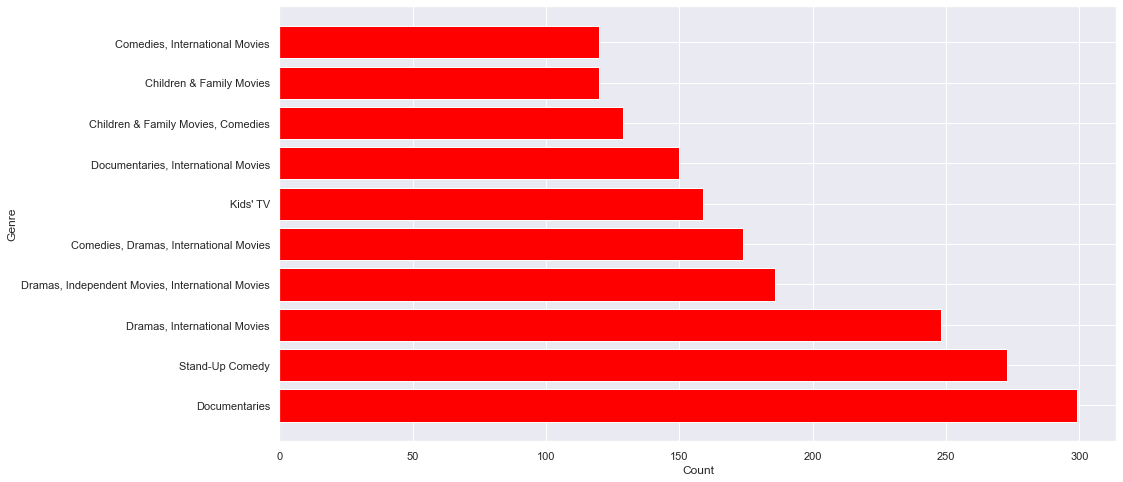

In [7]:
top_10_genres = df['listed_in'].value_counts().sort_values(ascending = False)[:10]
index = top_10_genres.index
values = top_10_genres.values
plt.figure(figsize = (15, 8))
plt.barh(index, values, color = 'red')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

Majority of content belongs to Documentaries, Stand-Up Comedy, Drama, International movies

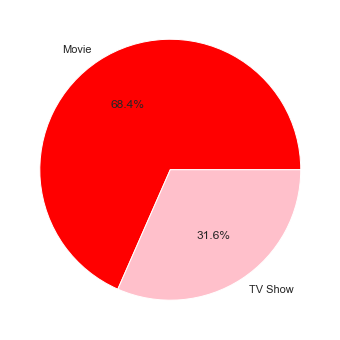

In [30]:
types = df['type'].value_counts()
content_type = types.index
count = types.values
plt.figure(figsize = (8,6))
plt.pie(count, labels = content_type, autopct='%1.1f%%', colors = ['red', 'pink'])
plt.show()

Most of the content are movies.

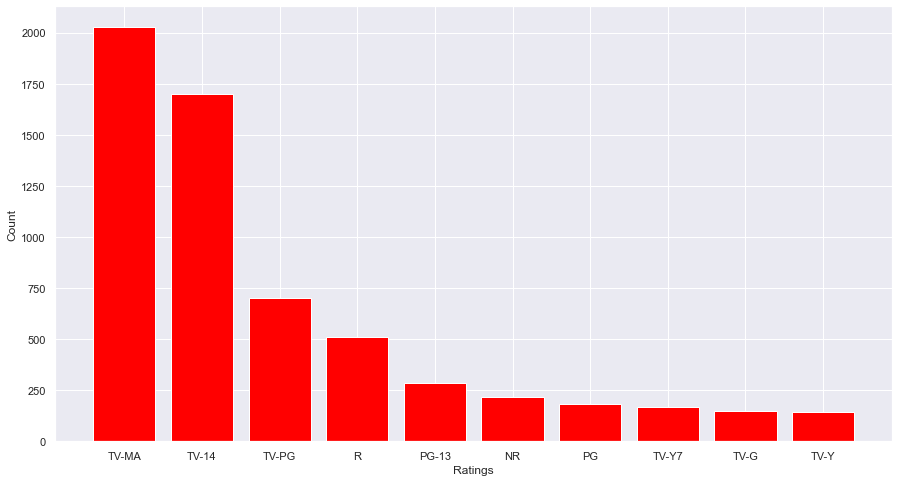

In [32]:
ratings = df['rating'].value_counts().sort_values(ascending = False)[:10]
rat = ratings.index
values = ratings.values
plt.figure(figsize = (15, 8))
plt.bar(rat, values, color = 'red')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

Most of the content have TV-MA & TV-14 rating.

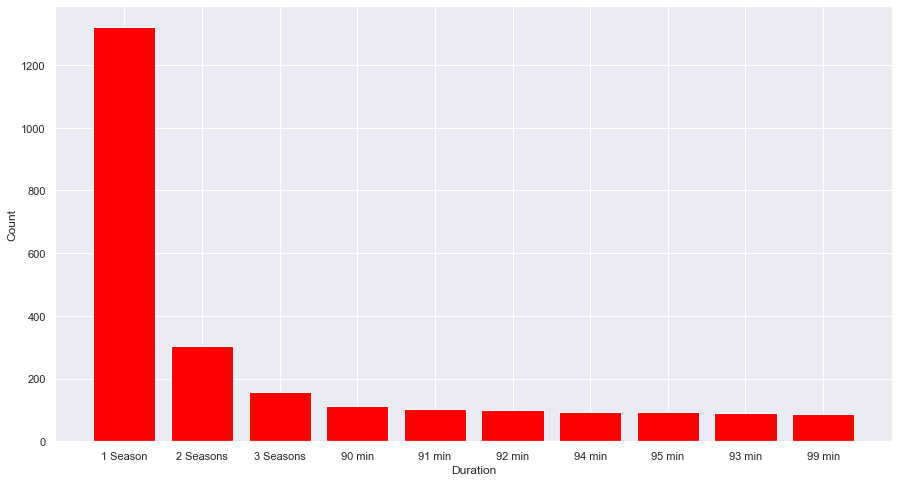

In [36]:
duration = df['duration'].value_counts().sort_values(ascending = False)[:10]
dur = duration.index
values = duration.values
plt.figure(figsize = (15, 8))
plt.bar(dur, values, color = 'red')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

Most of the content duration is 1 season.

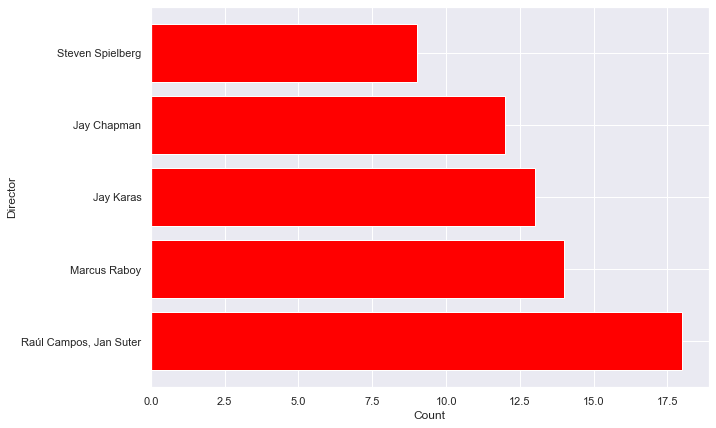

In [6]:
top_5_dir = df['director'].value_counts().sort_values(ascending = False)[:5]
index = top_5_dir.index
values = top_5_dir.values
plt.figure(figsize = (10, 7))
plt.barh(index, values, color = 'red')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()